## This script contains the following points:

### Importing Data & visualization Libraries
### Data Cleaning 
### Data prep for regression analysis
### Regression analysis

## Importing Data & visualization Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [77]:
# assigning path
path=r'C:/Users/Gal-E/CF Data Analysis/Achievement 6'

# import "immodata_sqm2.pkl" dataframe from "Prepared Data" folder
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_sqm2.pkl'))

## Data cleaning

In [78]:
df.columns

Index(['bundesland', 'city', 'district', 'street', 'zip_code', 'has_kitchen',
       'balcony', 'lift', 'garden', 'floor', 'flat_type',
       'telekom_uploadspeed', 'firing_type', 'heating_type', 'number_of_rooms',
       'square_meter', 'base_rent', 'total_rent', 'service_charge',
       'immoscout_id', 'price_per_m2'],
      dtype='object')

In [79]:
df.head()

bundesland                 city                      district  \
0  Nordrhein-Westfalen             Dortmund                      SchÃ¼ren   
1              Sachsen              Dresden  Ã„uÃŸere_Neustadt_Antonstadt   
2               Bremen               Bremen             Neu_Schwachhausen   
3              Sachsen  Mittelsachsen_Kreis                      Freiberg   
5   Baden-WÃ¼rttemberg    Emmendingen_Kreis                    Denzlingen   

                        street  zip_code  has_kitchen  balcony   lift  garden  \
0   Sch&uuml;ruferstra&szlig;e     44269        False    False  False    True   
1                    Turnerweg      1097        False     True   True   False   
2  Hermann-Henrich-Meier-Allee     28213        False     True  False   False   
3                   Am Bahnhof      9599        False    False  False    True   
5               no_information     79211         True    False  False   False   

   floor  ... telekom_uploadspeed  firing_type  \
0      1  ...           10.000000          oil   
1      3  ...            2.400391          NaN   
2      1  ...                 NaN          gas   
3      1  ...            2.400391          NaN   
5      2  ...           40.000000          oil   

                     heating_type number_of_rooms  square_meter  base_rent  \
0                 central_heating               4            86        595   
1                   floor_heating               3            84        965   
2  self_contained_central_heating               3            85        765   
3  self_contained_central_heating               2            62        310   
5                     oil_heating               2            53        580   

   total_rent  service_charge  immoscout_id price_per_m2  
0         840             245      96107057     6.917969  
1        1300             255     113147523    11.484375  
2         903             138     114751222     9.000000  
3         380              70     114391930     5.000000  
5         690             110     106416361    10.945312  

[5 rows x 21 columns]

In [6]:
df.shape

(184945, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184945 entries, 0 to 228331
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   bundesland           184945 non-null  object  
 1   city                 184945 non-null  object  
 2   district             184945 non-null  object  
 3   street               184945 non-null  object  
 4   zip_code             184945 non-null  int32   
 5   has_kitchen          184945 non-null  bool    
 6   balcony              184945 non-null  bool    
 7   lift                 184945 non-null  bool    
 8   garden               184945 non-null  bool    
 9   floor                184945 non-null  int16   
 10  flat_type            160162 non-null  category
 11  telekom_uploadspeed  162965 non-null  float16 
 12  firing_type          149227 non-null  category
 13  heating_type         159305 non-null  category
 14  number_of_rooms      184945 non-null  int16   
 15  squar

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

bundesland                 0
city                       0
district                   0
street                     0
zip_code                   0
has_kitchen                0
balcony                    0
lift                       0
garden                     0
floor                      0
flat_type              24783
telekom_uploadspeed    21980
firing_type            35718
heating_type           25640
number_of_rooms            0
square_meter               0
base_rent                  0
total_rent                 0
service_charge             0
immoscout_id               0
price_per_m2               0
dtype: int64

In [9]:
df['flat_type'].value_counts()

flat_type
apartment              98975
roof_storey            23569
ground_floor           15799
other                   6460
maisonette              6249
raised_ground_floor     3116
penthouse               2419
terraced_flat           2224
half_basement            726
loft                     625
Name: count, dtype: int64

In [14]:
df['firing_type'].value_counts().head(20)

firing_type
gas                                     75759
district_heating                        37915
oil                                     11936
natural_gas_light                        7772
electricity                              3148
natural_gas_heavy                        2925
geothermal                               1658
pellet_heating                           1654
gas:electricity                           906
combined_heat_and_power_fossil_fuels      754
steam_district_heating                    692
local_heating                             652
environmental_thermal_energy              591
solar_heating                             337
heat_supply                               330
district_heating:electricity              318
liquid_gas                                316
solar_heating:gas                         205
gas:district_heating                      153
wood_chips                                123
Name: count, dtype: int64

In [15]:
df['heating_type'].value_counts().head(20)

heating_type
central_heating                   90409
district_heating                  19070
gas_heating                       15130
self_contained_central_heating    12603
floor_heating                     12496
oil_heating                        3608
heat_pump                          1754
combined_heat_and_power_plant      1579
night_storage_heater               1010
wood_pellet_heating                 715
electric_heating                    609
stove_heating                       191
solar_heating                       131
Name: count, dtype: int64

for this supervised machine learning we dont use those variables with missing values. For now i leave them as it is

In [17]:
# Checking for duplicates

dups = df.duplicated()
dups.shape          # No duplicates

(184945,)

C:\Users\Gal-E\AppData\Local\Temp\ipykernel_5412\606343052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_rent'], bins=25) # Shows extreme values
C:\Users\Gal-E\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_rent', ylabel='Density'>

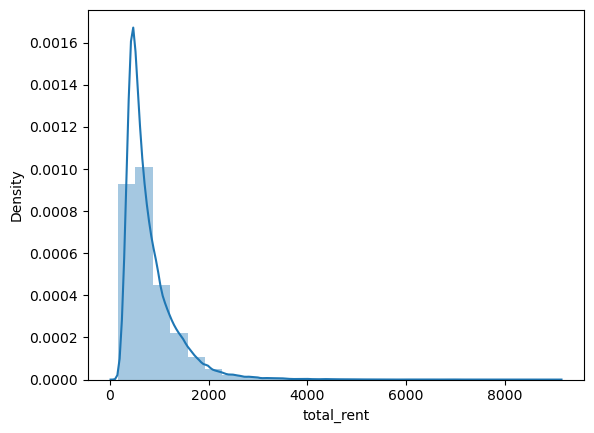

In [18]:
# checking Extreme values 

sns.distplot(df['total_rent'], bins=25) # Shows extreme values

# double checking it *in previous steps we already removed the extreme outliers

In [19]:
df['total_rent'].describe()

count    184945.000000
mean        809.390781
std         538.287539
min         160.000000
25%         470.000000
50%         643.000000
75%         978.000000
max        9000.000000
Name: total_rent, dtype: float64

## Data prep for regression analysis

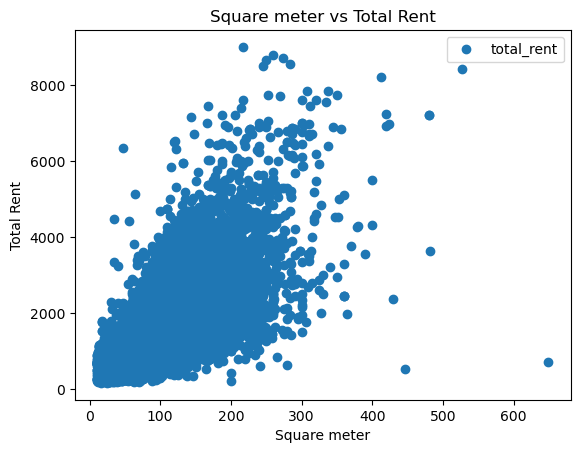

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'square_meter', y='total_rent',style='o')  # The style option creates a scatterplot; without it, we only have lines.
plt.title('Square meter vs Total Rent')  
plt.xlabel('Square meter')  
plt.ylabel('Total Rent')  
plt.show()

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['square_meter'].values.reshape(-1,1)
y = df['total_rent'].values.reshape(-1,1)

In [27]:
X

array([[ 86],
       [ 84],
       [ 85],
       ...,
       [ 85],
       [115],
       [ 95]], dtype=int16)

In [28]:
y

array([[ 840],
       [1300],
       [ 903],
       ...,
       [ 670],
       [1150],
       [ 930]], dtype=int16)

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

### Hypothesis

#### If the unit has more Square meters, the total rent would be higher

In [30]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
LinearRegression()

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

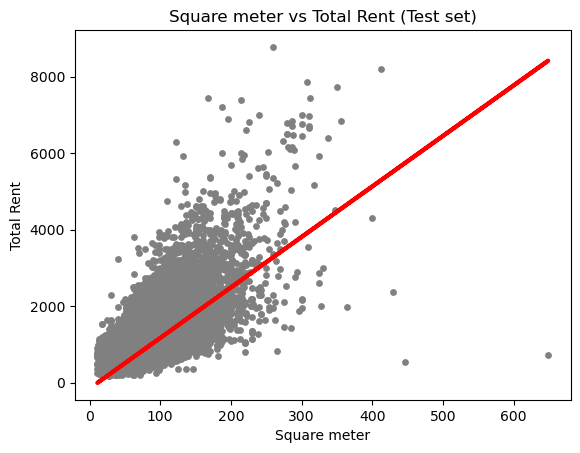

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Square meter vs Total Rent (Test set)')
plot_test.xlabel('Square meter')
plot_test.ylabel('Total Rent')
plot_test.show()

In [36]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)   # This is the mean squared error
r2 = r2_score(y_test, y_predicted)               # This is the R2 score. 

In [37]:
# Printing the model summary statistics. This is where we evaluate the performance of the test model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.20844024]]
Mean squared error:  130894.85157715675
R2 score:  0.5567025819925857


### Interpretation

1. The slope is positive, so the relationship is positive. This aligns with my hypothesis that total rent higher when square meter is higher.
2. The MSE is 130894.8 , means the regression line is not  an accurate representation of the data. data points are farther away from regression line.
3. The R2 score of 0.56 that represents a poor fit.

In [38]:
y_predicted

array([[984.08098334],
       [231.19988984],
       [587.82777623],
       ...,
       [627.45309694],
       [878.41346144],
       [878.41346144]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual    Predicted
0      765   984.080983
1      284   231.199890
2      445   587.827776
3      771   984.080983
4      970   706.703738
5      325   455.743374
6      690   838.788141
7      847   402.909613
8      673   482.160254
9     1164   997.289424
10    1250  1036.914744
11    1194  1261.458228
12     980  1208.624467
13     425   429.326493
14     370   508.577135
15     910  1433.167951
16     350   508.577135
17     670   402.909613
18     505   627.453097
19     530   759.537499
20     835   719.912179
21     650   667.078418
22     490   706.703738
23     850   878.413461
24     482   733.120619
25    1120   574.619336
26     241   217.991450
27     438   627.453097
28     832   534.994015
29    1152   785.954380

### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.20844024]]
Mean squared error:  127559.55101216867
R2 score:  0.5561340272155268


### Include any reflections you have on the impact of possible data bias.
The values are similar to the model. I do not see positive relationship here, low MSE and low R2 value. This indicates that the square meter is not a good determinant of the Total Rent. This could be true because in reality there are other important factors that would be considered in determining Total Rent.

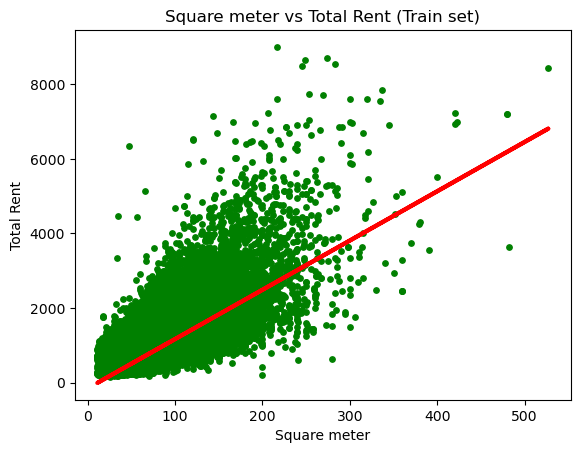

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Square meter vs Total Rent (Train set)')
plot_test.xlabel('Square meter')
plot_test.ylabel('Total Rent')
plot_test.show()

### Checking performance improvement after removing outliers square_meter above 250 and total_rent 4000

there were no significant difference after remowing outliers

In [65]:
# Clean the higher values from the "total_rent" and "square_meter"


df_test = df[(df['square_meter'] <= 250) & (df['total_rent'] <= 4000)]

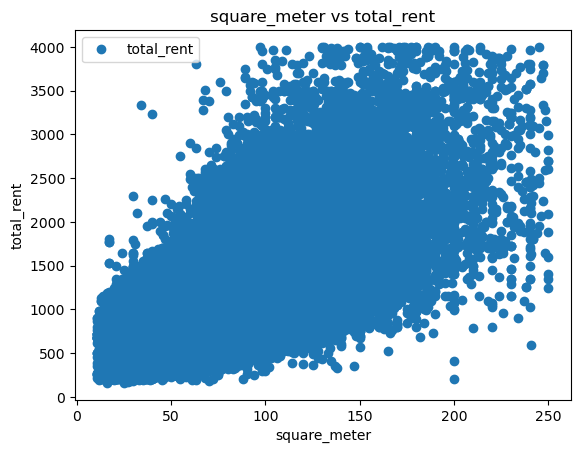

In [66]:
# See how the scatterplot looks

df_test.plot(x = 'square_meter', y='total_rent', style='o')  
plt.title('square_meter vs total_rent')  
plt.xlabel('square_meter')  
plt.ylabel('total_rent')  
plt.show()

In [67]:
# Reshape again.

X_2 = df_test['square_meter'].values.reshape(-1,1)
y_2 = df_test['total_rent'].values.reshape(-1,1)

In [68]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [69]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [70]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [71]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.43860744]]
Mean squared error:  107062.11165152217
R2 score:  0.5384857529846795


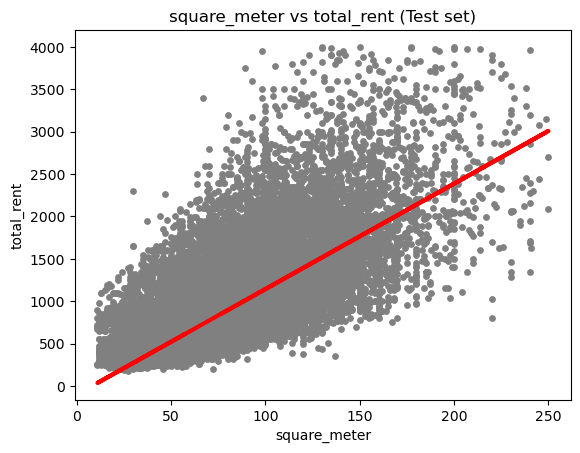

In [73]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('square_meter vs total_rent (Test set)')
plot_test.xlabel('square_meter')
plot_test.ylabel('total_rent')
plot_test.show()

In [74]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual    Predicted
0      402   608.164004
1      336   483.777930
2      408   620.602612
3      655   670.357041
4      595   682.795649
5      363   558.409574
6      500   421.584893
7      552   769.865901
8     1045  1105.708302
9     1445  1167.901339
10    1176   944.006405
11    2060   583.286789
12    2212  1752.515889
13     423   608.164004
14     595   757.427293
15     365   633.041219
16    1350  1031.076657
17     591   695.234256
18     259   160.374136
19     320   521.093752
20     539   732.550079
21     654  1155.462732
22     530   819.620331
23     385   496.216537
24     800  1143.024124
25     255   135.496921
26    3105  1615.691207
27    3800  1317.164628
28    1165   931.567798
29     740   794.743116